# Домашнее задание 2
## Named Entety Recognition and Event Extraction from Literary Fiction

deadline: 30 октября 2019, 23:59

В этом домашнем задании вы будете работать с корпусом LitBank. Корпус собран из популярных художественных произведений на английском языке и сожержит разметку по именованным сущностям и событиям. Объем корпуса таков: 100 текстов по примерно 2000 слов каждый. 

Корпус описан в статьях:
* David Bamman, Sejal Popat, Sheng Shen, An Annotated Dataset of Literary Entities http://people.ischool.berkeley.edu/~dbamman/pubs/pdf/naacl2019_literary_entities.pdf
* Matthew Sims, Jong Ho Park, David Bamman, Literary Event Detection,  http://people.ischool.berkeley.edu/~dbamman/pubs/pdf/acl2019_literary_events.pdf

Корпус доступен в репозитории проекта:  https://github.com/dbamman/litbank

Статья и код, использованный для извлечения именованных сущностей: 
* Meizhi Ju, Makoto Miwa and Sophia Ananiadou, A Neural Layered Model for Nested Named Entity Recognition, https://github.com/meizhiju/layered-bilstm-crf

Структура корпуса устроена так. 
Первый уровень: 
* entities -- разметка по сущностям
* events -- разметка по сущностям


В корпусе используются 6 типов именованных сущностей: PER, LOC, ORG, FAC, GPE, VEH (имена, локации, организации, помещения, топонимы, средства перемещния), допускаются вложенные сущности. 

События выражается одним словом - *триггером*, которое может быть глагом, прилагательным и существительным. В корпусе описаны события, которые действительно происходят и не имеют гипотетического характера. 
Пример: she *walked* rapidly and resolutely, здесь *walked* -- триггер события. Типы событий не заданы. 



Второй уровень:
* brat -- рабочие файлы инструмента разметки brat, ann-файлы содержат разметку, txt-файлы – сырые тексты 
* tsv -- tsv-файлы содержат разметку в IOB формате,


В статье и репозитории вы найдете идеи, которые помогут вам выполнить домашнее задание. Их стоит воспринимать как руководство к действию, и не стоит их копировать и переиспользовать. Обученные модели использовать не нужно, код для их обучения можно использовать как подсказку. 

## ПРАВИЛА
1. Домашнее задание выполняется в группе до 3-х человек.
2. Домашнее задание сдается через anytask, инвайты будут дополнительно высланы.
3. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо ipython-тетрадке. 
4. Отчет должен содержать: нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
5. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
6. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
7. Плагиат и любое недобросоветсное цитирование приводит к обнуление оценки. 


## Часть 1. [2 балла] Эксплоративный анализ 
1. Найдите топ 10 (по частоте) именованных сущностей каждого из 6 типов.
2. Найдите топ 10 (по частоте) частотных триггеров событий. 
3. Кластеризуйте все уникальные триггеры событий, используя эмбеддинги слов и любой алгоритм кластеризации (например, агломеративный иерархический алгоритм кластеризации) и попробуйте проинтерпретировать кластеры: есть ли очевидные типы событий? 

[бонус] Визуализируйте полученные кластеры с помощью TSNE или UMAP

[бонус] Постройте тематическую модель по корпусу и сравните кластеры тригеров и выделенные темы: есть ли схожие паттерны в тематической модели и в стурктуре кластеров?

В следующих частях домашнего задания вам понадобится train-test-dev разбиение. Авторы статей предлагают следующую структуру разбиения: обучающее множество – 80 книг, валидационное – 10 книг, тестовое – 10 книг. Предложения из одного источника не должны попадать в разные сегменты разбиения. 


## Часть 2. [3 балла] Извлечение именованных сущностей
1. Обучите стандартную модель для извлечения именованных сущностей, CNN-BiLSTM-CRF, для извлечения именованных *низкоуровневых именованных сущностей*, т.е. для самых коротких из вложенных сущностей. 
Модель устроена так: сверточная сеть на символах + эмбеддинги слов + двунаправленная LSTM сеть (модель последовательности) + CRF (глобальная нормализация).
2. Замените часть модели на символах и словах (CNN + эмбеддинги словах) на ELMo и / или BERT. Должна получиться модель ELMo / BERT + BiLSTM + CRF. 
3. Замените модель последовательности (BiLSTM) на другой слой, например, на Transformer. Должна получиться модель CNN  + Transformer + CRF. 

[бонус] Дообучите BERT для извлечения именованных сущностей.

[бонус] Используйте модель для извлечения вложенных именованных сущностей [Ju et al., 2018]

[бонус] Модифицируйте модель для извлечения вложенных именованных сущностей [Ju et al., 2018]: вместо эмбеддингов слов используйте ELMo и/или BERT. 

## Часть 3. [2 балла] Извлечение событий 

1. Используйте BiLSTM на эмбеддингах слов для извлечения триггеров событий. 

2. Замените часть модели на  словах  на ELMo и/или BERT.  Должна получиться модель ELMo / BERT + BiLSTM.

[бонус] Предобучите BiLSTM как языковую модель. Дообучите ее для извлечения триггеров. 

[бонус] Дообучите BERT для извлечения триггеров событий. 

## Часть 4. [2 балла] Одновременное извлечение именованных сущностей и событий 
1. Обучите модель для совместного извлечения именованных сущностей и триггеров событий. У модели должен быть общий энкодер (например, CNN + BiLSMT, ELMo + BiLSTM, BERT + BiLSTM) и два декодера: один отвечает за извлечение именнованных сущностей, другой отвечает за извлечение триггеров событий.

[бонус] Добавьте в модель механизм внимания, так, как это покажется вам разумным.

[бонус] Визуализируйте карты механизма внимания. 

## Часть 5. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Сравните результаты всех разработанных моделей. Что помогло вам в выполнении работы, чего не хватало?

In [1]:
import os
import torch
import numpy as np
import pandas as pd
import torchtext
from torchtext.data import Dataset
from torchtext.datasets import SequenceTaggingDataset
import csv
import pickle
from sklearn.model_selection import train_test_split

In [2]:
ENTITIES_TSV = 'data/entities/tsv/'
MAX_FILES = None

In [3]:
class DataParser:
    def __init__(self):
        self._words_set = set()
        self._char_set = set()
        self._tags_set = set()
        self._entities_files = os.listdir(ENTITIES_TSV)
        
    def get_sentences(self, tsv_files):
        sentances, tags = list(), list()
        for file_name in tsv_files:
            file_path = os.path.join(ENTITIES_TSV, file_name)
            df = self._read_one_tsv(file_path)
            s, t = self._split_df_to_sentences(df)
            sentances.extend(s)
            tags.extend(t)
        return sentances, tags
    
    def _read_one_tsv(self, path):
        #print(path)
        df = pd.read_csv(path, sep='\t', header=None, encoding='utf-8', quoting=csv.QUOTE_NONE)
        return df.iloc[:, :2]
    
    def _split_df_to_sentences(self, df):
        sentences = []
        tags = []
        delimiter = '.'
        delimiter_ind = np.where(df[0].values == delimiter)[0]
        for i, end in enumerate(delimiter_ind):
            begin = delimiter_ind[i - 1] + 1 if i != 0 else 0
            sent_df = df[begin: end]
            sent = sent_df.iloc[:, 0].str.lower().values
            tag = sent_df.iloc[:, 1].values
            for word in sent:
                self._words_set.add(word)
                self._char_set = self._char_set.union(set(word))
            self._tags_set = self._tags_set.union(set(tag))
            sentences.append(sent)
            tags.append(tag)
        return sentences, tags
    
    def init_vocab(self):
        self.word2ind = dict()
        self.ind2word = dict()
        for i, word in enumerate(self._words_set):
            self.word2ind[word] = i
            self.ind2word[i] = word
        
        self.char2ind = dict()
        self.ind2char = dict()
        self.char2ind['#'] = 0
        self.ind2char[0] = '#'
        for i, ch in enumerate(self._char_set):
            self.char2ind[ch] = i + 1
            self.ind2char[i + 1] = ch
        
        self.tag2ind = dict()
        self.ind2tag = dict()
        for i, tag in enumerate(self._tags_set):
            self.tag2ind[tag] = i
            self.ind2tag[i] = tag
        
    def get_train_test(self, tsv_files, test_size=0.3):
        train_files, test_files = train_test_split(tsv_files, test_size=test_size)
        return self.get_sentences(train_files), self.get_sentences(test_files)

In [4]:
dp = DataParser()
train_data, test_data = dp.get_train_test(os.listdir(ENTITIES_TSV))

In [5]:
dp.init_vocab()

In [6]:
def sent2matrix(sent, max_word_len=None):
    assert dp.char2ind['#'] == 0
    
    max_word_len = max_word_len if max_word_len is not None else max(map(len, sent))
    char_matrix = np.zeros([len(sent), max_word_len], np.int64)
    word_matrix = np.zeros(len(sent), dtype=np.int64)
    for i, word in enumerate(sent):
        word_matrix[i] = dp.word2ind[word]
        for j, ch in enumerate(word):
            if j == max_word_len:
                break
            char_matrix[i, j] = dp.char2ind[ch]
    return torch.LongTensor(torch.from_numpy(word_matrix)), torch.LongTensor(torch.from_numpy(char_matrix))

In [7]:
sent2matrix(train_data[0][2])

(tensor([ 6078,   391,  9134, 10036, 16478,  8266,  3754,  6587,  9134, 10036,
         12455,  2766,  2296, 15024,  2766,  2505,  2751,  2025, 13249,  2766,
          2271,  5855, 13041, 11888,  4138,  1979,  9988,  4665,  5705, 12455,
           875, 12615,  7109,   875, 15019]),
 tensor([[61, 14,  0,  0,  0,  0,  0,  0,  0],
         [35, 44, 66, 45, 19,  0,  0,  0,  0],
         [12, 41,  0,  0,  0,  0,  0,  0,  0],
         [63, 45, 15, 44,  0,  0,  0,  0,  0],
         [38, 45, 61,  5,  0,  0,  0,  0,  0],
         [61,  5, 44,  0,  0,  0,  0,  0,  0],
         [35, 44, 66, 45, 19, 19, 45, 19, 66],
         [14, 15,  0,  0,  0,  0,  0,  0,  0],
         [12, 41,  0,  0,  0,  0,  0,  0,  0],
         [63, 45, 15, 44,  0,  0,  0,  0,  0],
         [30,  0,  0,  0,  0,  0,  0,  0,  0],
         [45,  0,  0,  0,  0,  0,  0,  0,  0],
         [10, 44, 25, 14, 10, 49,  0,  0,  0],
         [61,  5, 27, 61,  0,  0,  0,  0,  0],
         [45,  0,  0,  0,  0,  0,  0,  0,  0],
         [38

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd
from torchcrf import CRF
from tqdm import tqdm_notebook as tqdm

In [9]:
def batch_generator(data, batch_size=32, is_cuda=True):
    x_data, y_data = data
    for i in tqdm(range(0, len(x_data), batch_size)):
        if i + batch_size > len(x_data):
            break
        batch_sentances = np.hstack(x_data[i: i + batch_size])
        batch_tags = np.hstack(y_data[i: i + batch_size])
        tags_vec = torch.LongTensor(torch.from_numpy(np.array([dp.tag2ind[tag] for tag in batch_tags], dtype=np.int64)))
        word_vec, char_matrix = sent2matrix(batch_sentances)
        if is_cuda:
            word_vec = word_vec.cuda()
            char_matrix = char_matrix.cuda()
            tags_vec = tags_vec.cuda()
        yield (word_vec, char_matrix), tags_vec
    return

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch
from torchcrf import CRF

class CNN_BiLSTM_CRF(nn.Module):
    def __init__(self, char_count, char_embedding_dim, word_count, word_embedding_dim, n_filters, 
                 filter_sizes, dropout, hidden_dim, num_classes=13):
        super().__init__()
        self.hidden_dim = hidden_dim
        
        self.char_embedding = nn.Embedding(char_count, char_embedding_dim)
        self.convs = nn.ModuleList([nn.Conv2d(in_channels=1, out_channels=n_filters, 
                                              kernel_size=(size, char_embedding_dim)) for size in filter_sizes])
        self.fc = nn.Linear(len(filter_sizes) * n_filters, n_filters * 2)
        self.dropout = nn.Dropout(dropout)
        
        self.word_embedding = nn.Embedding(word_count, word_embedding_dim)
        
        self.lstm = nn.LSTM(word_embedding_dim + n_filters * 2, 
                            self.hidden_dim // 2, bidirectional=True, batch_first=True)
        self.hidden2tag = nn.Linear(self.hidden_dim, num_classes)
        
        self.CRF = CRF(num_classes, batch_first=True)
        
        
    def forward(self, inp):
        out_cnn = []
        words, chars = inp
        for x in chars:
            x = x.view(1, -1)
            char_embedded = self.char_embedding(x)
            char_embedded = char_embedded.unsqueeze(1)
            conved = [F.relu(conv(char_embedded)).squeeze(3) for conv in self.convs]
            pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
            char_cat = self.dropout(torch.cat((pooled), dim=1))
            out_cnn.append(char_cat)
            
        out_cnn = torch.cat(out_cnn, dim=0)
        fin_cat = torch.cat((self.word_embedding(words), out_cnn), 1)
        char_cat = fin_cat.unsqueeze(1)
        char_cat = self.dropout(char_cat)

        lstm_out, _ = self.lstm(char_cat)
        lstm_out = lstm_out.view(len(words), self.hidden_dim)
        lstm_feats = self.hidden2tag(lstm_out)
        
        out = F.log_softmax(lstm_feats)
        return out

In [11]:
from tqdm import tqdm_notebook as tqdm
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch.optim as optim
from sklearn.metrics import f1_score


def train_epoch(model, optimazer, criterion, gen):
    loss_log, acc_log = [], []
    step = 0
    
    model.train(True)

    for batch in gen:   
        data = batch[0]
        target = batch[1]

        optimazer.zero_grad()

        output = model(data)
        loss = -model.CRF(output.unsqueeze(1), target.unsqueeze(1)) / len(data[0])
        
        acc = f1_score(model.CRF.decode(output.unsqueeze(1)), 
                       target.cpu(), average='macro').mean()
        acc_log.append(acc.item())

        loss.backward()
        optimazer.step()
        loss_log.append(loss.item())
        step += 1
    return loss_log, acc_log, step
        
    
def test(model, criterion, gen):
    loss_log, acc_log = [], []
    model.eval()

    for batch in gen:   
        data = batch[0]
        target = batch[1]

        output = model(data)
        loss = -model.CRF(output.unsqueeze(1), torch.tensor(target).unsqueeze(1)) / len(data[0])
        
        acc = f1_score(model.CRF.decode(output.unsqueeze(1)), 
                       target, average='macro').mean()
        acc_log.append(acc.item())
        
        loss_log.append(loss.item())
        
    return loss_log, acc_log

    
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()
    
    
def train(model, optimazer, criterion, n_epochs=15, is_cuda=True):
    if is_cuda:
        model = model.cuda()
    train_loss_log, train_acc_log = [], []
    val_loss_log, val_acc_log = [], []
    
    for epoch in range(n_epochs):
        print('Epoch {0} of {1}'.format(epoch, n_epochs))
        
        train_gen = batch_generator(train_data, batch_size=64, is_cuda=is_cuda)
        test_gen = batch_generator(test_data, batch_size=64, is_cuda=is_cuda)
        
        train_loss, train_acc, step = train_epoch(model, optimazer, criterion, train_gen)
        train_loss_log.extend(train_loss)
        train_acc_log.extend(train_acc)
        
        val_loss, val_acc = test(model, criterion, test_gen)
        print(val_loss)
        val_loss_log.append((step * (epoch + 1), np.mean(val_loss)))
        print(val_acc)
        val_acc_log.append((step * (epoch + 1), np.mean(val_acc)))
        
        clear_output()
        plot_history(train_loss_log, val_loss_log)
        plot_history(train_acc_log, val_acc_log, title='accuracy')

        print("Epoch: {0}, val loss: {1}, val accuracy: {2}".format(epoch, 
                                                                    np.mean(val_loss), np.mean(val_acc)))
    model = model.cpu()

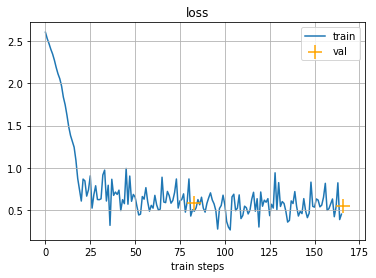

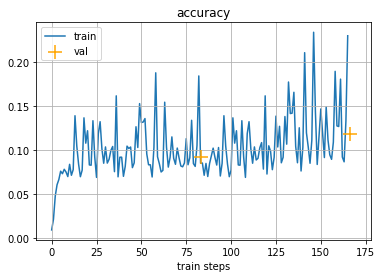

Epoch: 1, val loss: 0.5494299399502137, val accuracy: 0.11821685644895874
Epoch 2 of 15


In [ ]:
import torch.optim as optim
"""
char_count, char_embedding_dim, word_count, word_embedding_dim, n_filters, 
                 filter_sizes, dropout, hidden_dim, num_classes=13
"""
char_count = len(dp.char2ind)
word_count = len(dp.word2ind)
word_embedding_dim = 200
char_embedding_dim = 30
n_filters = 15
filter_sizes = [2, 3]
dropout = 0.2
N_EPOCHS = 15
hidden_dim = 230

model = CNN_BiLSTM_CRF(char_count, char_embedding_dim, word_count, word_embedding_dim, 
                   n_filters, filter_sizes,
                   dropout, hidden_dim)
loss_function = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

train(model, optimizer, loss_function, n_epochs=15, is_cuda=False)
